<a href="https://colab.research.google.com/github/JoanaEnes/Coursera_Capstone/blob/main/Capstone_Project_The_Battle_of_Neighborhoods_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

According to Wikipedia, Tijuca is a neighborhood in the North Zone of the city of Rio de Janeiro. It is among the oldest, most traditional and populous neighborhoods in the capital of Rio. Its quality of life index in 2000 was 0.887, the 18th best in the city, among 126 neighborhoods evaluated, considered high. According to data from 2010, it had 163,805 inhabitants, the largest in the North Zone. In the ranking of the most valued neighborhoods in the municipality, Tijuca occupies the 20th position.

Due to its varied transport options, it has become a lodging option for national and foreign tourists.
In gastronomy, the Tijuca is not far behind either, it has 3 traditionally adapted gastronomic poles :  Praça Varnhagen, Rua Uruguai and Rua Mariz e Barros, and there is also a Saens Peña Square with many bars, patisseries and restaurants.
Such a populous neighborhood with a rich infrastructure is not difficult to imagine that it will be considered for opening new venues.


**Business Problem**

As everyone knows, choosing a location for a new business is an extremely difficult and challenging decision, the difference between achieving or not achieving positive results in a new venture can come from the selection of the commercial point. It is opportune to always think about having a favorable and more strategic place as possible. But how do you know where this place is?
This work proposes to bring, through the data extracted from Foursquare and the unsupervised machine learning algorithm 'k-means clustering', a better understanding of how the bars in the Tijuca neighborhood are distributed and which places would be more suitable for opening a new one.
The objective to be achieved here is to be able to provide enough information so that investors can clearly have the most interesting points of Tijuca for the opening of a new bar.

# DATA

To start data collection, we extracted information from wikipedia about the name of the neighborhoods that make up the “grande tijuca”.
With the help of the 'geopy' library, we found the latitudes and longitudes of these neighborhoods, and this information was used to search the foursquare API for locations in this neighborhood within a pre-established radius. We then include a column to categorize the data that is of interest to us for study and save it to a specific dataframe.

**Data Preparation**

Before we start with the main project content, let's download all the dependencies we will need

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests - this module helps us to download a web page
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import seaborn as sns # seaborn

import matplotlib.pyplot as plt # Matplotlib and associated plotting modules
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from sklearn.cluster import KMeans # import k-means from clustering stage
from sklearn.metrics import silhouette_samples, silhouette_score # import k-means from clustering stage

#!conda install -c conda-forge folium=0.5.0 --yes 

import folium # map rendering library

from bs4 import BeautifulSoup #import BeautifulSoup - this module helps in web scrapping.
import pprint

print('Libraries imported.')

Libraries imported.


To use a foursquare API, let's define Foursquare Credentials and Version

In [3]:
CLIENT_ID = 'RHXL4XQLWT4NMTVYIV52Q1HI4QPZQ1DOEMCVCXIS31JXD1JF' # your Foursquare ID Joana
CLIENT_SECRET = 'AHQN5YQNQE0XRT4CN5RGDZDL53RX5JCQUYQ10CPHQINFMWGI' # your Foursquare Secret  Joana
ACCESS_TOKEN = 'E4BNFXH1EIWIFOUQJOLVEHI0IVDPAPYIDNSCEXVE11N5ZPV3' # your FourSquare Access Token  Joana
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RHXL4XQLWT4NMTVYIV52Q1HI4QPZQ1DOEMCVCXIS31JXD1JF
CLIENT_SECRET:AHQN5YQNQE0XRT4CN5RGDZDL53RX5JCQUYQ10CPHQINFMWGI



From that point on, we will begin to search for important data for the study. 

In [4]:
#List of neighborhoods in "Grande tijuca"
#List was extracted from the website https://pt.wikipedia.org/wiki/Lista_de_bairros_da_cidade_do_Rio_de_Janeiro

Borough_tijuca = ['Alto da Boa Vista, RJ', 'Andaraí, RJ', 'Maracanã, RJ', 'Grajaú, RJ' , 'Praça da Bandeira, RJ', 'Tijuca, RJ', 'Vila Isabel, RJ' ]

In [5]:
# Get latitude and longitude of the listed neighborhoods

df_Borough= []
for bairro in Borough_tijuca:
  geolocator = Nominatim(user_agent="foursquare_agent")
  location = geolocator.geocode(bairro)
  latitude = location.latitude
  longitude = location.longitude
  df_Borough.append({'Borough': bairro, 'Borough_Latitude': latitude , 'Borough_Longitude' : longitude})


As we can see below, we now have a dataframe with all the neighborhoods that make up Tijuca as well as the latitude and longitude of each one of them. 

In [6]:
# Transform the list into a dataframe
df_Borough = pd.DataFrame(df_Borough)
df_Borough.head()

,Borough,Borough_Latitude,Borough_Longitude
0,"Alto da Boa Vista, RJ",-22.962113,-43.253582
1,"Andaraí, RJ",-22.929084,-43.253486
2,"Maracanã, RJ",-22.912162,-43.231175
3,"Grajaú, RJ",-22.929884,-43.269550
4,"Praça da Bandeira, RJ",-22.911216,-43.213198


Let's start exploring the Foursquare API. This will be important for us to research existing establishments in the neighborhoods listed above.

In [7]:
# Creation function to repeat the process of exploring spaces for all neighborhoods in Dataframe using the Foursquare API - EM CONSTRUÇÃO


def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['categories'][0]['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_ID',
                  'Venue_Category',
                  'Venue_Latitude', 
                  'Venue_Longitude']
    return(nearby_venues)

In [8]:
#New dataframe with "Tijuca" venues using the function created before

LIMIT = 100
radius = 1000
tijuca_venues = getNearbyVenues(names=df_Borough['Borough'],
                                   latitudes=df_Borough['Borough_Latitude'],
                                   longitudes=df_Borough['Borough_Longitude'],
                                   radius = radius
                                  )


For this study we will consider only those "Venue_Category" that have the word "bar" in the name.

In [9]:
#Change the main category of all venues that have the word "bar

df_bar = tijuca_venues.loc[tijuca_venues['Venue_Category'].str.contains('Bar'), 'Prime_Category'] = 'Bar'

# Now let's explore places with the main category "Bar" and created a dataframe with the importante information about

df_bar = tijuca_venues.loc[tijuca_venues['Prime_Category'] == 'Bar']

df_bar = df_bar.drop_duplicates('Venue_ID')
df_bar

,Borough,Latitude,Longitude,Venue,Venue_ID,Venue_Category,Venue_Latitude,Venue_Longitude,Prime_Category
3,"Andaraí, RJ",-22.929084,-43.253486,Boteco Vou Demais,50ae3886e4b004e6d186cef9,Dive Bar,-22.926412,-43.253423,Bar
7,"Andaraí, RJ",-22.929084,-43.253486,Bar Santo Remédio,4ef782f94fc6f26c26151ee3,Bar,-22.924775,-43.256872,Bar
10,"Andaraí, RJ",-22.929084,-43.253486,Buteco do Barão,5467f32d498ea0e865527fa0,Bar,-22.926348,-43.247458,Bar
12,"Andaraí, RJ",-22.929084,-43.253486,Boteco do Raoni,5a78c084491be712e2b4666b,Beer Bar,-22.924216,-43.254592,Bar
13,"Andaraí, RJ",-22.929084,-43.253486,Bardot Vinhos e Artes,4d9659d20caaa143ec9975b3,Wine Bar,-22.923575,-43.256350,Bar
...,...,...,...,...,...,...,...,...,...
397,"Vila Isabel, RJ",-22.915222,-43.247263,Yeasteria Ponto Cervejeiro,534186f8498e8a823c5665a3,Bar,-22.918708,-43.239297,Bar
401,"Vila Isabel, RJ",-22.915222,-43.247263,Bar Gente Nossa,4cd716eafb718eecf7964c88,Bar,-22.913641,-43.244185,Bar
437,"Vila Isabel, RJ",-22.915222,-43.247263,Edson Freitas Haute Coiffeur,4bc4e94e5e0ab713a7aa45eb,Salon / Barbershop,-22.919365,-43.250501,Bar
459,"Vila Isabel, RJ",-22.915222,-43.247263,Varandão MT73,4cf031511d18a143ebb74aec,Bar,-22.919036,-43.253883,Bar


We now have a dataframe with all 78 bars in the region and we can group it based on its location. 

# Clustering

With the necessary information in hand, we will work on the venues based on their location using k means.

K-means is an unsupervised machine learning algorithm for clustering data. It aims to separate data into “k” clusters, based on the distance from each point to be centroid.

According to Hugo Honda, “The task of the algorithm is to find the nearest centroid (using some distance metric) and assign the point found to that cluster. After this step, the centroids are specialized, always taking the average value of all points in that cluster. For this method, numerical values ​​are considered for the distance calculation, the nominal values ​​can then be mapped into binary values ​​for the same calculation. In case of success, the data are separated organically and can be labeled and centroid referenced to classify new data. "

To evaluate the ideal “K”, the Elbow and Silhouette method will be used.

The elbow method is a very simple and widely used method to assess the best number of clusters needed. Tests the variation of the data in relation to the number of clusters. It is considered an ideal k value when the increase in the number of clusters does not represent a significant gain value.

About Silhouette, based on wikipeadia, it refers to a method of interpretation and validation of consistency within data clusters. The technique provides a succinct graphical representation of how well each object has been classified.
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to +1, where a high value indicates that the object blends well with its own cluster and hardly matches neighboring clusters. If most objects have a high value, the cluster configuration is appropriate. If many points have a low or negative value, the cluster configuration can have many or few clusters.
The silhouette can be calculated with any distance metric, such as Euclidean distance or Manhattan distance.


In [10]:
# let's to prepare the dataframe just with the lat and log to venues
#drop all others collumns

df_bar_clustering = df_bar.drop(['Borough', 'Latitude', 'Longitude' , 'Venue', 'Venue_ID','Venue_Category', 'Prime_Category'], 1)



1 2 3 4 5 6 7 8 9 10 11 12 13 14 

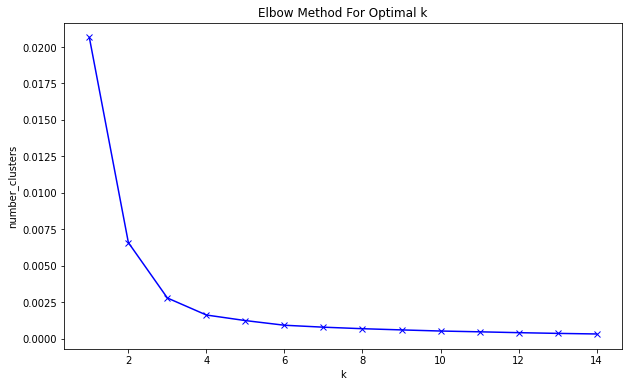

In [11]:
# Find the best k for kmeans

#elbown method

number_clusters = []
K = range(1,15)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=20).fit(df_bar_clustering)
    number_clusters.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, number_clusters, 'bx-')
plt.xlabel('k')
plt.ylabel('number_clusters')
plt.title('Elbow Method For Optimal k');

I believe that 3 or 4 clusters are ideas for our study based on the elbow method.
But let's try the silhouette to make the best choice


For n_clusters = 3 The average silhouette_score is : 0.5964544700229589
For n_clusters = 4 The average silhouette_score is : 0.6301132504093082
For n_clusters = 5 The average silhouette_score is : 0.5868906454055728


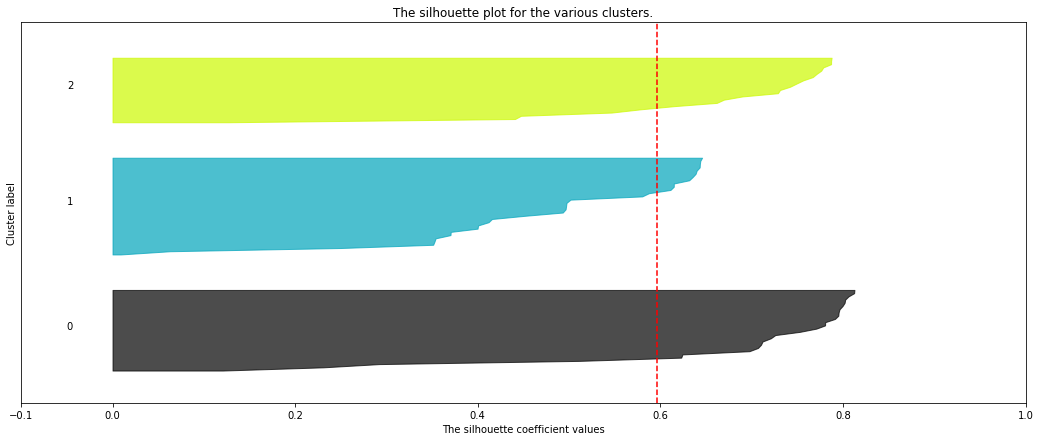

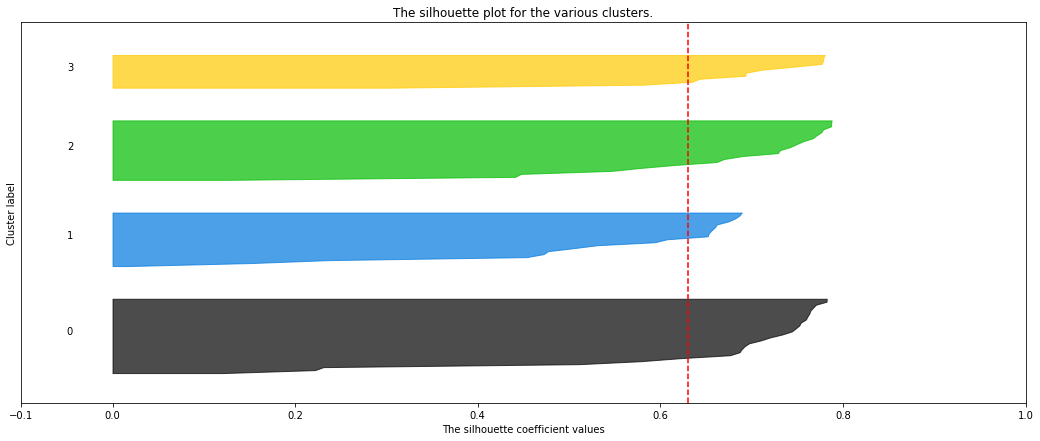

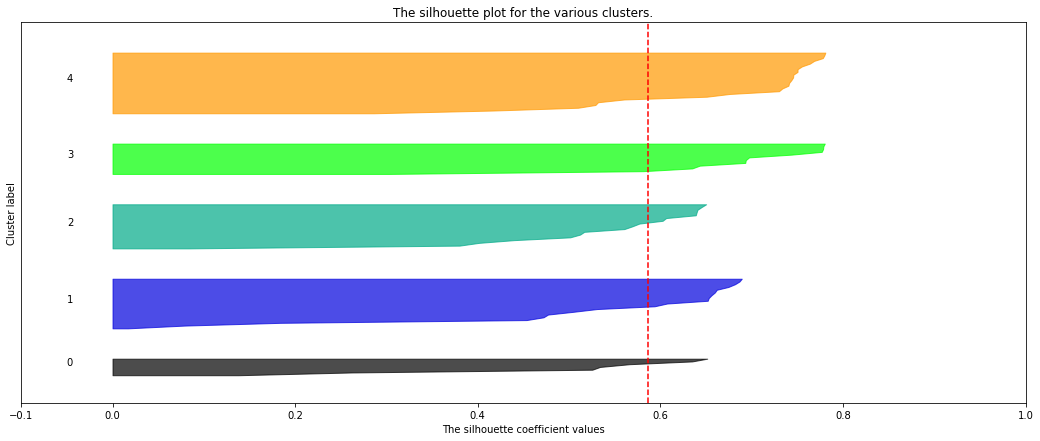

In [12]:
# let's plot the silhouette for k 3, 4 and 5 and evaluate the best option

range_n_clusters = [ 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot 
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_bar_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_bar_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_bar_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_bar_clustering, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    

plt.show()

The k = 4 proved to be the best option, we will continue the study using this configuration to K means. 

In [13]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init=20).fit(df_bar_clustering)

kmeans_labels = kmeans.labels_

# include information about the cluster to dataframe

df_bar_clustering['cluster'] = kmeans_labels


In [14]:
#Now we will join the two dataframes to have all the important information for the continuity of the study
df_tijuca_bar= pd.merge(df_bar, df_bar_clustering, on=('Venue_Latitude', 'Venue_Longitude'), how='left')
df_tijuca_bar

,Borough,Latitude,Longitude,Venue,Venue_ID,Venue_Category,Venue_Latitude,Venue_Longitude,Prime_Category,cluster
0,"Andaraí, RJ",-22.929084,-43.253486,Boteco Vou Demais,50ae3886e4b004e6d186cef9,Dive Bar,-22.926412,-43.253423,Bar,3
1,"Andaraí, RJ",-22.929084,-43.253486,Bar Santo Remédio,4ef782f94fc6f26c26151ee3,Bar,-22.924775,-43.256872,Bar,3
2,"Andaraí, RJ",-22.929084,-43.253486,Buteco do Barão,5467f32d498ea0e865527fa0,Bar,-22.926348,-43.247458,Bar,1
3,"Andaraí, RJ",-22.929084,-43.253486,Boteco do Raoni,5a78c084491be712e2b4666b,Beer Bar,-22.924216,-43.254592,Bar,3
4,"Andaraí, RJ",-22.929084,-43.253486,Bardot Vinhos e Artes,4d9659d20caaa143ec9975b3,Wine Bar,-22.923575,-43.256350,Bar,3
...,...,...,...,...,...,...,...,...,...,...
73,"Vila Isabel, RJ",-22.915222,-43.247263,Yeasteria Ponto Cervejeiro,534186f8498e8a823c5665a3,Bar,-22.918708,-43.239297,Bar,2
74,"Vila Isabel, RJ",-22.915222,-43.247263,Bar Gente Nossa,4cd716eafb718eecf7964c88,Bar,-22.913641,-43.244185,Bar,2
75,"Vila Isabel, RJ",-22.915222,-43.247263,Edson Freitas Haute Coiffeur,4bc4e94e5e0ab713a7aa45eb,Salon / Barbershop,-22.919365,-43.250501,Bar,3
76,"Vila Isabel, RJ",-22.915222,-43.247263,Varandão MT73,4cf031511d18a143ebb74aec,Bar,-22.919036,-43.253883,Bar,3


In [15]:
# let's explore the clusters on a map

map = folium.Map(location=[latitude, longitude], zoom_start=13)
# set color scheme for the clusters
rainbow = ['blue'
           , 'yellow'
           , 'green'
           , 'red']

for grp_name, df_grp in df_tijuca_bar.groupby('cluster'):
    feature_group = folium.FeatureGroup("Cluster {}: {}".format(grp_name,rainbow[grp_name]))
    for row in df_grp.itertuples():
        folium.CircleMarker(location=[row.Venue_Latitude, row.Venue_Longitude],
                          radius=5,
                          #popup=label,
                          color=rainbow[grp_name],
                          fill=True,
                          fill_color=rainbow[grp_name],
                          fill_opacity=0.7).add_to(feature_group)
    feature_group.add_to(map)

folium.LayerControl().add_to(map)
map

In [16]:
# Number of venue per cluster

df_tijuca_bar_total = df_tijuca_bar.groupby('cluster').count()
df_tijuca_bar_total

,Borough,Latitude,Longitude,Venue,Venue_ID,Venue_Category,Venue_Latitude,Venue_Longitude,Prime_Category
cluster,,,,,,,,,
0,21,21,21,21,21,21,21,21,21
1,12,12,12,12,12,12,12,12,12
2,26,26,26,26,26,26,26,26,26
3,19,19,19,19,19,19,19,19,19


To better understand what is the ideal location to open a new bar, we will reconnect to the api foursqaure and extract the rating from the locations.

For this collection, we will need to make premium calls where, unfortunately, there is a limitation of 500 calls per day. That way we did the extraction at another time and imported it into the csv file.

For the continuation of this study we will use the saved csv file.

In [17]:
#read and transform into a dataframe the information about likes and rating of all venues in tijuca
df_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_ratings.csv')




In [18]:
# let's merge this dataframe to our principal one

df_tijuca_bar_ratings= pd.merge(df_tijuca_bar, df_ratings, on=('Venue_ID'), how='left')

df_tijuca_bar_ratings

,Borough,Latitude,Longitude,Venue,Venue_ID,Venue_Category,Venue_Latitude,Venue_Longitude,Prime_Category,cluster,Unnamed: 0,Ratings
0,"Andaraí, RJ",-22.929084,-43.253486,Boteco Vou Demais,50ae3886e4b004e6d186cef9,Dive Bar,-22.926412,-43.253423,Bar,3,3.0,7.6
1,"Andaraí, RJ",-22.929084,-43.253486,Bar Santo Remédio,4ef782f94fc6f26c26151ee3,Bar,-22.924775,-43.256872,Bar,3,7.0,8.1
2,"Andaraí, RJ",-22.929084,-43.253486,Buteco do Barão,5467f32d498ea0e865527fa0,Bar,-22.926348,-43.247458,Bar,1,10.0,8.2
3,"Andaraí, RJ",-22.929084,-43.253486,Boteco do Raoni,5a78c084491be712e2b4666b,Beer Bar,-22.924216,-43.254592,Bar,3,13.0,7.7
4,"Andaraí, RJ",-22.929084,-43.253486,Bardot Vinhos e Artes,4d9659d20caaa143ec9975b3,Wine Bar,-22.923575,-43.256350,Bar,3,12.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,"Vila Isabel, RJ",-22.915222,-43.247263,Yeasteria Ponto Cervejeiro,534186f8498e8a823c5665a3,Bar,-22.918708,-43.239297,Bar,2,401.0,8.7
81,"Vila Isabel, RJ",-22.915222,-43.247263,Bar Gente Nossa,4cd716eafb718eecf7964c88,Bar,-22.913641,-43.244185,Bar,2,405.0,7.3
82,"Vila Isabel, RJ",-22.915222,-43.247263,Edson Freitas Haute Coiffeur,4bc4e94e5e0ab713a7aa45eb,Salon / Barbershop,-22.919365,-43.250501,Bar,3,441.0,6.9
83,"Vila Isabel, RJ",-22.915222,-43.247263,Varandão MT73,4cf031511d18a143ebb74aec,Bar,-22.919036,-43.253883,Bar,3,463.0,6.1


In [19]:
# the number of rows are incresed, so we will drop all venue_id there are duplicate
df_tijuca_bar_ratings = df_tijuca_bar_ratings.drop_duplicates('Venue_ID')

# Drop the column "Unnamed: 0" because it ' s just a csv index

df_tijuca_bar_ratings = df_tijuca_bar_ratings.drop(['Unnamed: 0'],1)
df_tijuca_bar_ratings

,Borough,Latitude,Longitude,Venue,Venue_ID,Venue_Category,Venue_Latitude,Venue_Longitude,Prime_Category,cluster,Ratings
0,"Andaraí, RJ",-22.929084,-43.253486,Boteco Vou Demais,50ae3886e4b004e6d186cef9,Dive Bar,-22.926412,-43.253423,Bar,3,7.6
1,"Andaraí, RJ",-22.929084,-43.253486,Bar Santo Remédio,4ef782f94fc6f26c26151ee3,Bar,-22.924775,-43.256872,Bar,3,8.1
2,"Andaraí, RJ",-22.929084,-43.253486,Buteco do Barão,5467f32d498ea0e865527fa0,Bar,-22.926348,-43.247458,Bar,1,8.2
3,"Andaraí, RJ",-22.929084,-43.253486,Boteco do Raoni,5a78c084491be712e2b4666b,Beer Bar,-22.924216,-43.254592,Bar,3,7.7
4,"Andaraí, RJ",-22.929084,-43.253486,Bardot Vinhos e Artes,4d9659d20caaa143ec9975b3,Wine Bar,-22.923575,-43.256350,Bar,3,8.0
...,...,...,...,...,...,...,...,...,...,...,...
80,"Vila Isabel, RJ",-22.915222,-43.247263,Yeasteria Ponto Cervejeiro,534186f8498e8a823c5665a3,Bar,-22.918708,-43.239297,Bar,2,8.7
81,"Vila Isabel, RJ",-22.915222,-43.247263,Bar Gente Nossa,4cd716eafb718eecf7964c88,Bar,-22.913641,-43.244185,Bar,2,7.3
82,"Vila Isabel, RJ",-22.915222,-43.247263,Edson Freitas Haute Coiffeur,4bc4e94e5e0ab713a7aa45eb,Salon / Barbershop,-22.919365,-43.250501,Bar,3,6.9
83,"Vila Isabel, RJ",-22.915222,-43.247263,Varandão MT73,4cf031511d18a143ebb74aec,Bar,-22.919036,-43.253883,Bar,3,6.1


Now we are going to assess the distribution of ratings by the clusters, in this step we will be able to understand if we have outliers or other discrepancies.


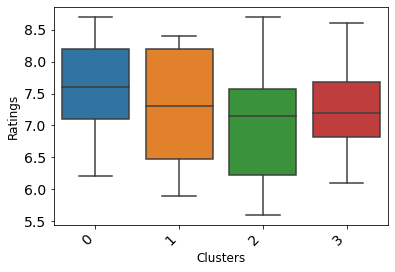

In [20]:
# boxplot for he like counts
plt.figure()

ax = sns.boxplot(x="cluster", y="Ratings", data=df_tijuca_bar_ratings)
ax.set_ylabel('Ratings', fontsize=12)
ax.set_xlabel('Clusters', fontsize=12)
ax.tick_params(labelsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

When we talk about the optics of the notes they are well distributed without outliers, the median is above 7 in all the clusters, which indicates a certain parity of them in this topic.

Cluster 0 stands out because its median is higher than the others, and has the highest lowest ratings among the objects of study.


In [108]:
# Average ratings for each cluster
df_tijuca_bar_likes.groupby('cluster').mean()

,Latitude,Longitude,Venue_Latitude,Venue_Longitude,Ratings
cluster,,,,,
0,-22.911351,-43.215766,-22.912180,-43.215369,7.604762
1,-22.931495,-43.244537,-22.930705,-43.244458,7.266667
2,-22.912515,-43.233031,-22.917348,-43.234989,7.023077
3,-22.925436,-43.251848,-22.922675,-43.254166,7.283333


## Analysis of the results  

Below you will individually evaluate the clusters found

Cluster 0 - 21 bars
It is the second most populous cluster and stands out from the others for having the highest rating and the best lowest score.

Cluster 1 - 12 bars
It is the cluster with the least amount of bars. It has no prominence as to their ratings.

Cluster 2 - 26 bars
It is the most populous cluster and has the greatest oscillation of counts. This cluster has the best and worst score of all locations.

Cluster 3 - 19 bars
It is a cluster very similar to cluster 0 in terms of the number of bars and note distribution. It had the second highest average of evaluations.

# Conclusion

It can be concluded that the best place to open a bar in Tijuca based on the data is the location inserted in cluster 0. This result is interesting because this region is formed by the neighborhoods Praça da Bandeira and Maracanã, fleeing a little from the most populated areas close to gastronomic centers.
We believe that this result is the result of a work to revitalize the neighborhoods and improve the infrastructure that solved a problem of years in this region with constant floods.
The place mixes traditional and new bars and is undoubtedly an aspiration to become another gastronomic hub of Tijuca that further reinforces our discoveries.